Este es el modelo de regresion para el proyecto

En general ese colab trata de de decargar y revisar cada datset buscando correlacion entre sus solumnas atraves de coeficientes de correlacion, digramas de dispersion y mapas de calor para buscar relaciones. Despues se cxrean modelos de regresion, visualizaciones y comprobaciones de su precision

In [1]:
#Se cargan las librerias necesarias
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [7]:
#Se almacena en una variable el datset
purchasepricesl = pd.read_csv('2017PurchasePricesFinal.csv')

In [13]:
purchasepricesl.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

Se buscan correlaciones

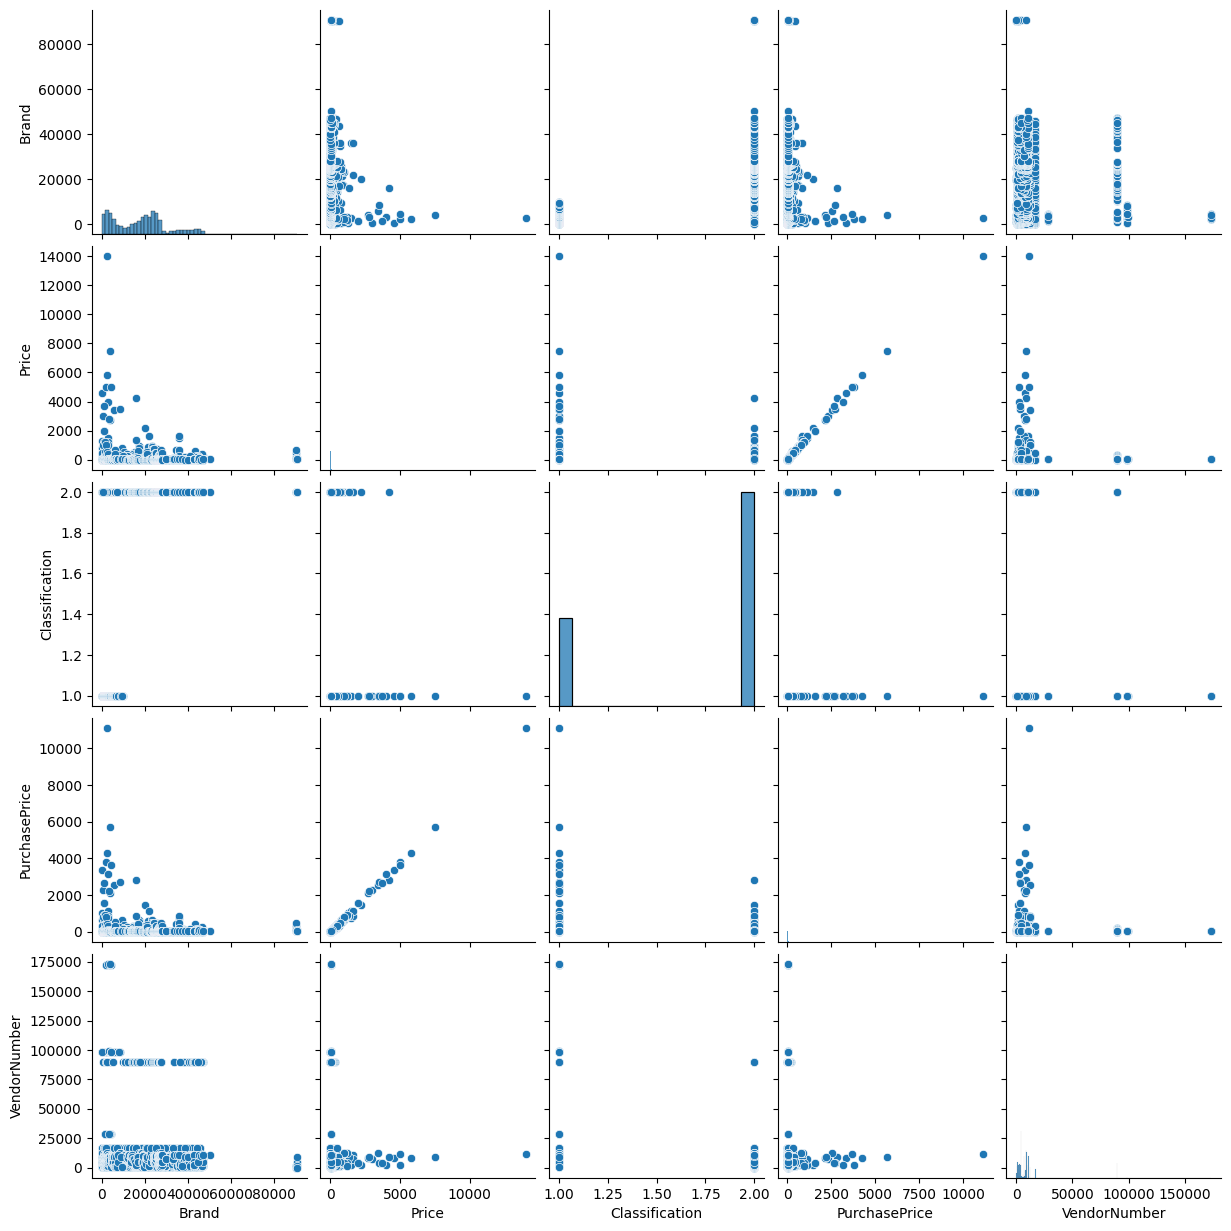

In [9]:
sns.pairplot(purchasepricesl)

In [10]:
purchasepricesl.corr(numeric_only=True)

,Brand,Price,Classification,PurchasePrice,VendorNumber
Brand,1.000000,-0.035806,0.733717,-0.043290,0.062693
Price,-0.035806,1.000000,-0.047101,0.997658,-0.014461
Classification,0.733717,-0.047101,1.000000,-0.056440,0.093366
PurchasePrice,-0.043290,0.997658,-0.056440,1.000000,-0.014130
VendorNumber,0.062693,-0.014461,0.093366,-0.014130,1.000000


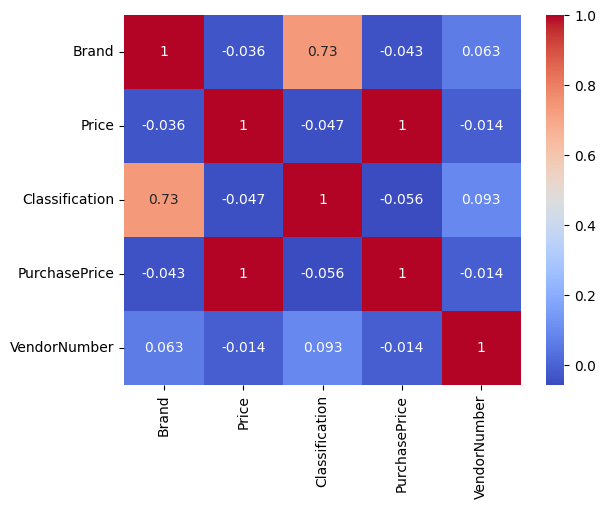

In [11]:
sns.heatmap(purchasepricesl.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

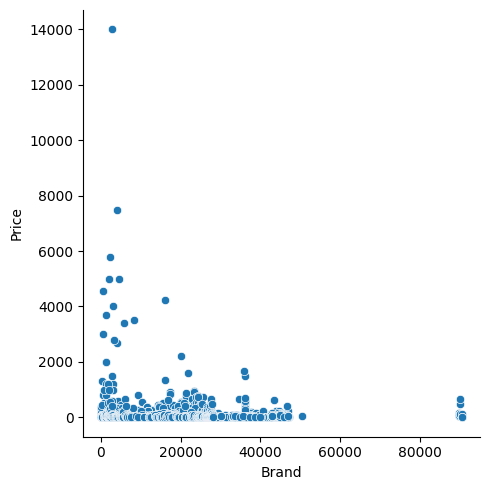

In [14]:
sns.relplot(data=purchasepricesl,x="Brand",y="Price")
plt.show()

Se crea un modelo de regresion lineal, su visualizacion y comprobacion

In [15]:
ols_data = purchasepricesl[["Brand", "Price"]]
ols_formula = "Price ~ Brand"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     15.74
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           7.32e-05
Time:                        21:36:46   Log-Likelihood:                -82723.
No. Observations:               12261   AIC:                         1.655e+05
Df Residuals:                   12259   BIC:                         1.655e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.2388      3.256     15.124      0.000      42.857      55.621
Brand         -0.0006      0.000     -3.967      0.000      -0.001      -0.000
==============================================================================
Omnibus:                    34866.049   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       2114950067.848
Skew:                          37.790   Prob(JB):                         0.00
Kurtosis:                    2036.260   Cond. No.                     3.84e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Brand', ylabel='Price'>

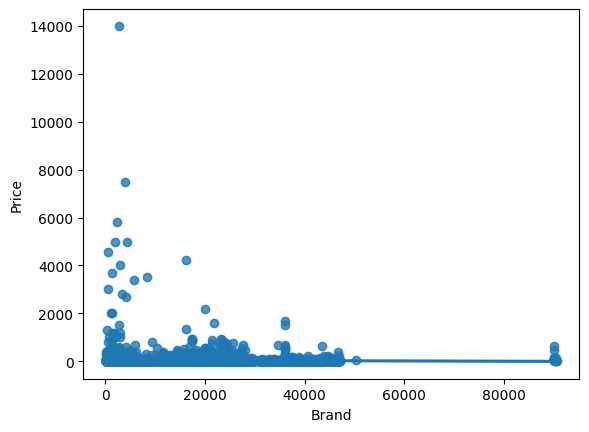

In [16]:
sns.regplot(x = "Brand", y = "Price", data = ols_data)

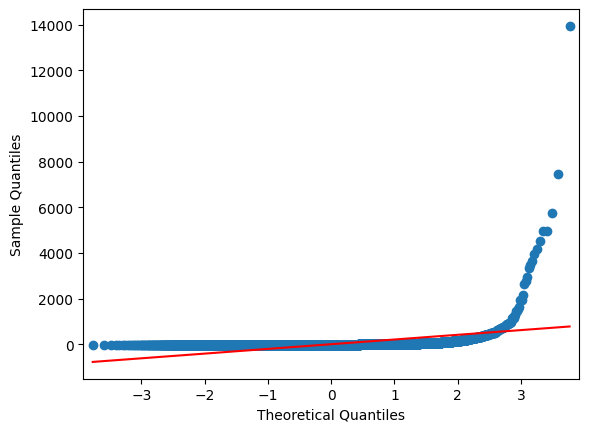

In [20]:
X = ols_data["Brand"]
fitted_values = model.predict(X)
residuals = model.resid
fig = sm.qqplot(model.resid, line = 's')
plt.show()

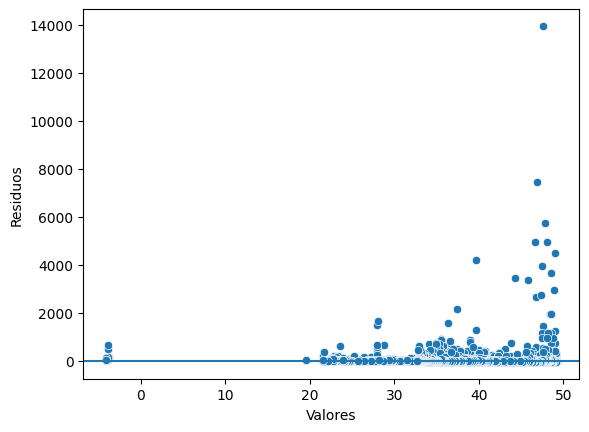

In [22]:
fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Valores")
fig.set_ylabel("Residuos")
plt.show()

En general el modelo no se ajusta a una correlacion acertada

Se hace el mismo proceso con el datset Invoice Purchases

In [23]:
invoicepur1 = pd.read_csv('InvoicePurchases.csv')

In [25]:
invoicepur1.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

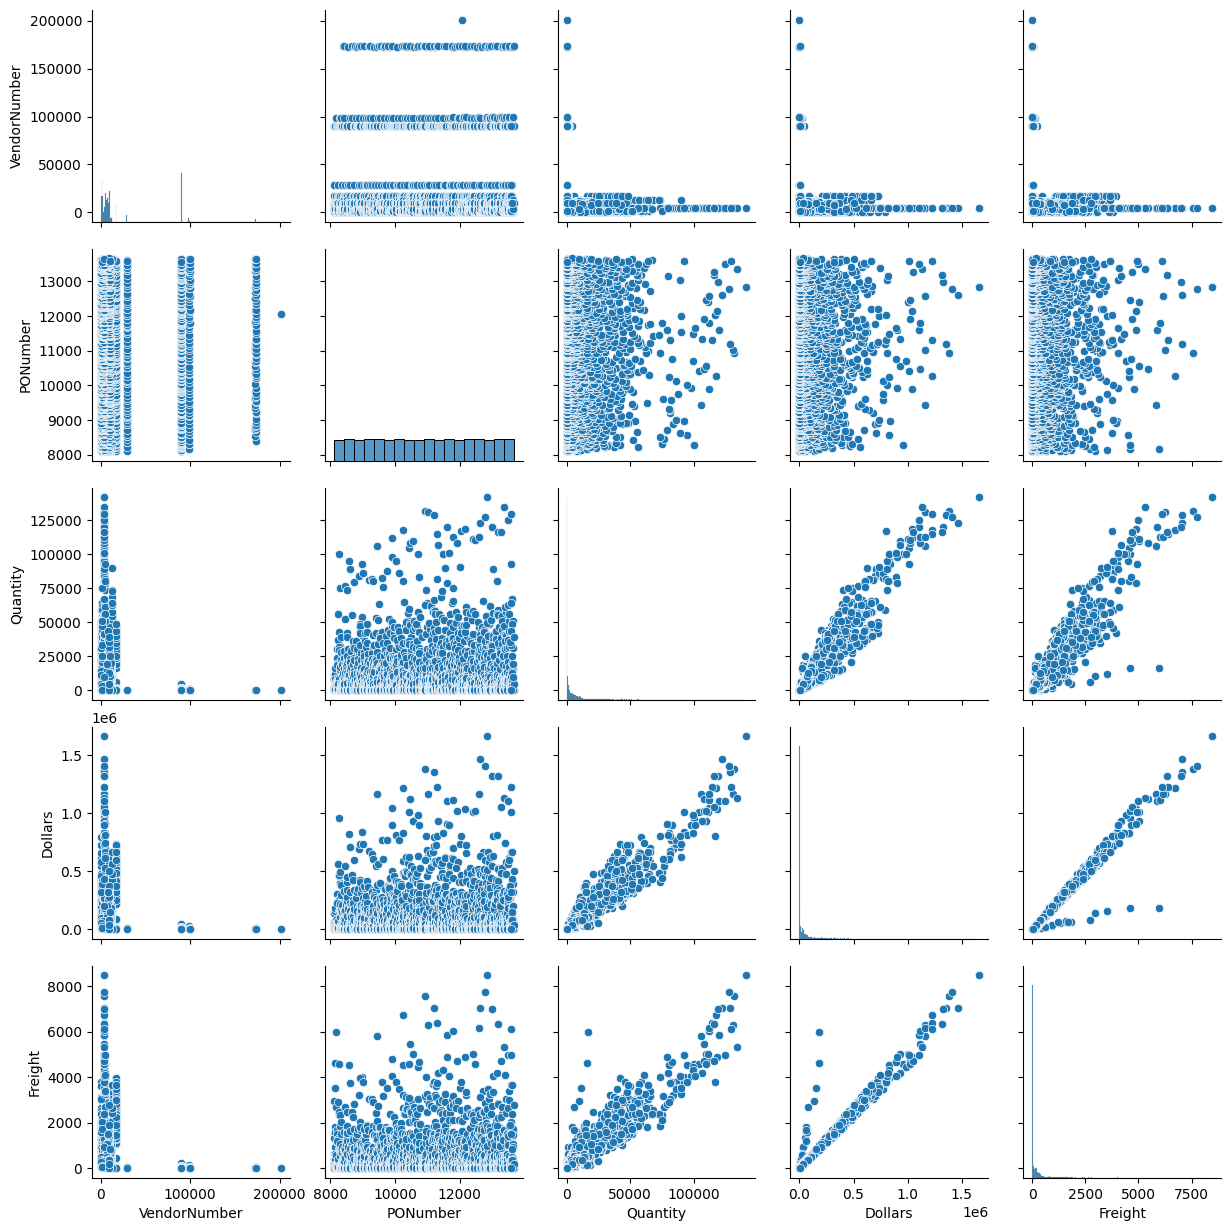

In [26]:
sns.pairplot(invoicepur1)

In [27]:
invoicepur1.corr(numeric_only=True)

,VendorNumber,PONumber,Quantity,Dollars,Freight
VendorNumber,1.000000,0.014151,-0.168329,-0.163386,-0.163493
PONumber,0.014151,1.000000,0.049230,0.058917,0.043617
Quantity,-0.168329,0.049230,1.000000,0.963831,0.946550
Dollars,-0.163386,0.058917,0.963831,1.000000,0.985141
Freight,-0.163493,0.043617,0.946550,0.985141,1.000000


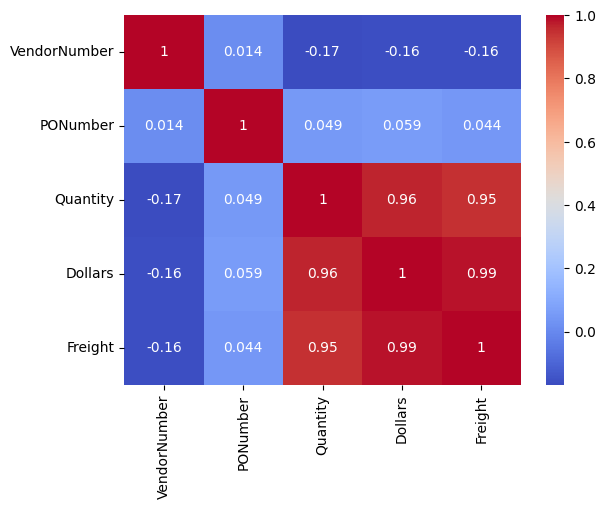

In [28]:
sns.heatmap(invoicepur1.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [29]:
ols_data = invoicepur1[["Quantity", "Dollars"]]
ols_formula = "Dollars ~ Quantity"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Dollars   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 7.247e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:12:51   Log-Likelihood:                -66226.
No. Observations:                5543   AIC:                         1.325e+05
Df Residuals:                    5541   BIC:                         1.325e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1413.1437    544.380      2.596      0.009     345.945    2480.342
Quantity       9.3516      0.035    269.198      0.000       9.284       9.420
==============================================================================
Omnibus:                     2530.331   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80772.955
Skew:                           1.556   Prob(JB):                         0.00
Kurtosis:                      21.440   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Quantity', ylabel='Dollars'>

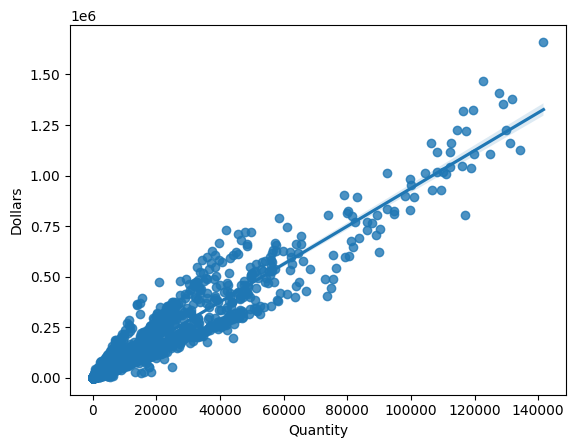

In [31]:
sns.regplot(x = "Quantity", y = "Dollars", data = ols_data)

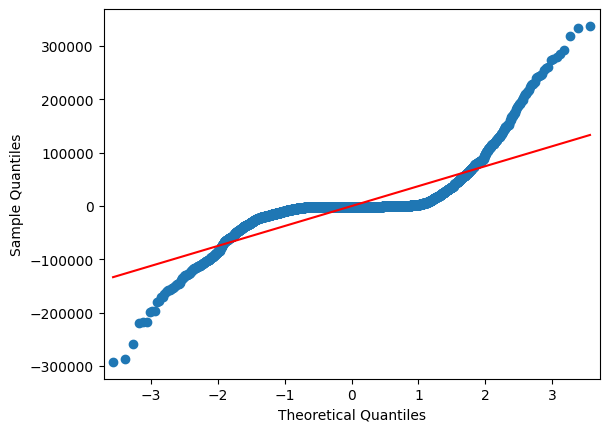

In [32]:
X = ols_data["Quantity"]
fitted_values = model.predict(X)
residuals = model.resid
fig = sm.qqplot(model.resid, line = 's')
plt.show()

In [33]:
ols_data = invoicepur1[["Quantity", "Freight"]]
ols_formula = "Freight ~ Quantity"
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Freight   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 4.772e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:17:21   Log-Likelihood:                -38012.
No. Observations:                5543   AIC:                         7.603e+04
Df Residuals:                    5541   BIC:                         7.604e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8062      3.353      3.820      0.000       6.234      19.379
Quantity       0.0467      0.000    218.440      0.000       0.046       0.047
==============================================================================
Omnibus:                     5945.081   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1533071.867
Skew:                           4.917   Prob(JB):                         0.00
Kurtosis:                      83.877   Cond. No.                     1.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: xlabel='Quantity', ylabel='Freight'>

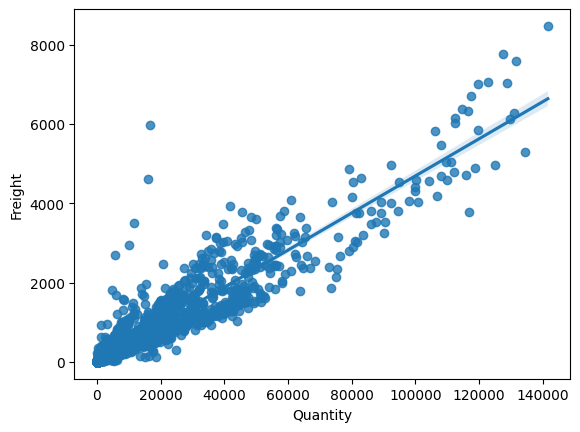

In [34]:
sns.regplot(x = "Quantity", y = "Freight", data = ols_data)

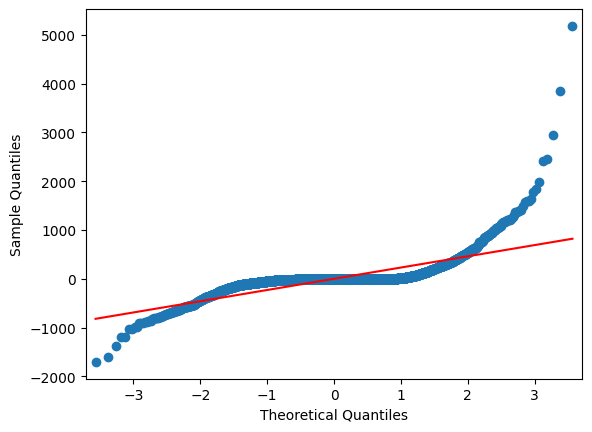

In [35]:
X = ols_data["Quantity"]
fitted_values = model.predict(X)
residuals = model.resid
fig = sm.qqplot(model.resid, line = 's')
plt.show()

Se repite la dinamica con el dataset de EndInvFinal

In [36]:
endin1 = pd.read_csv('EndInvFinal.csv')

In [37]:
endin1.columns

Index(['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size',
       'onHand', 'Price', 'endDate'],
      dtype='object')

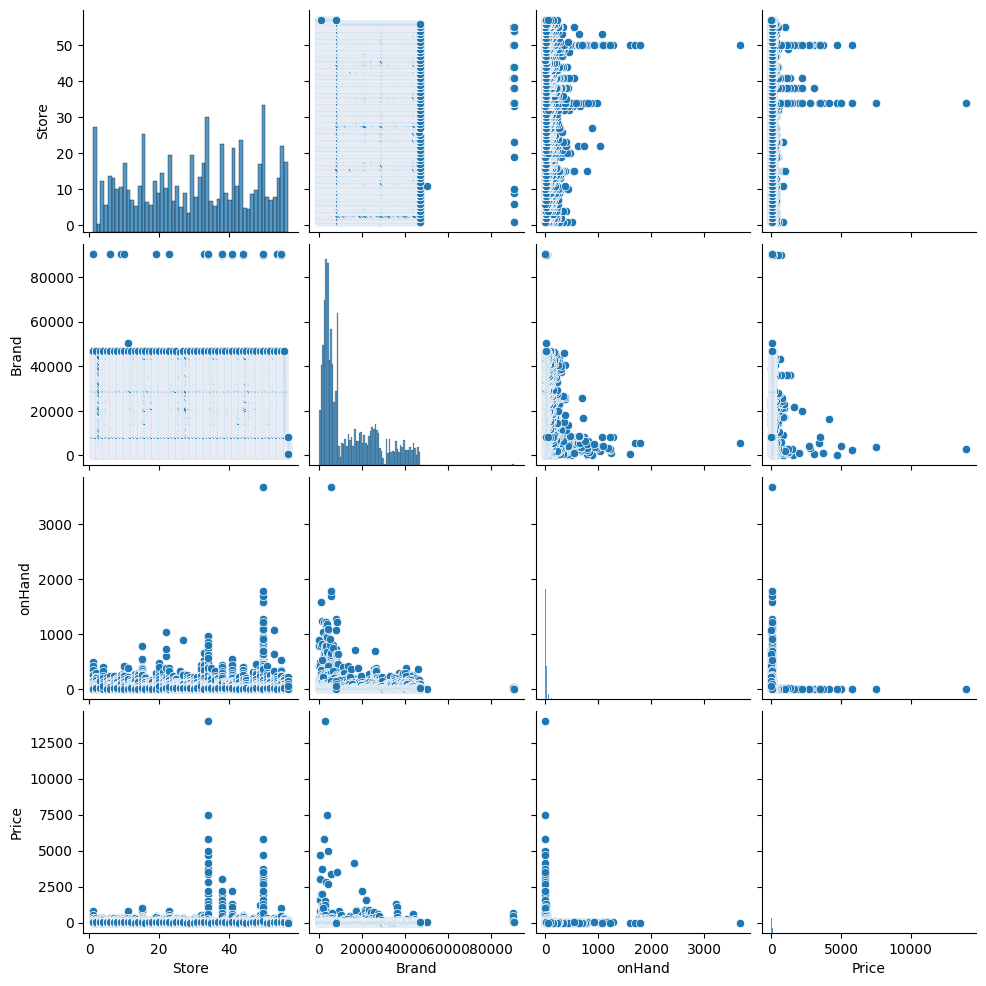

In [40]:
sns.pairplot(data=endin1)
plt.show()

In [38]:
endin1.corr(numeric_only=True)

,Store,Brand,onHand,Price
Store,1.000000,0.036789,0.038515,0.021036
Brand,0.036789,1.000000,-0.054303,-0.046190
onHand,0.038515,-0.054303,1.000000,-0.052559
Price,0.021036,-0.046190,-0.052559,1.000000


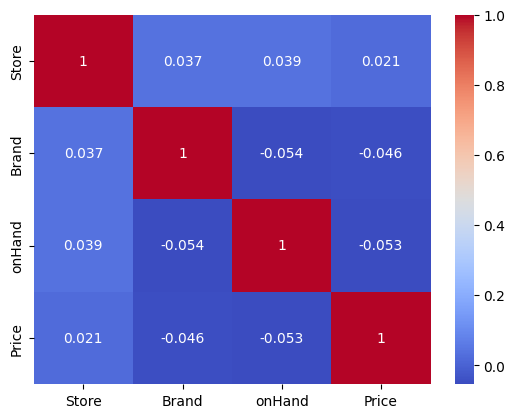

In [39]:
sns.heatmap(endin1.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

Se prefirio no hacer regresiones puesto que no se encuentran correlaciones entre lasmcolumnas

Se continua con el dataset SalesFINAL

In [42]:
purchasesfinal1 = pd.read_csv('PurchasesFINAL.csv')

In [43]:
purchasesfinal1.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber',
       'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate',
       'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification'],
      dtype='object')

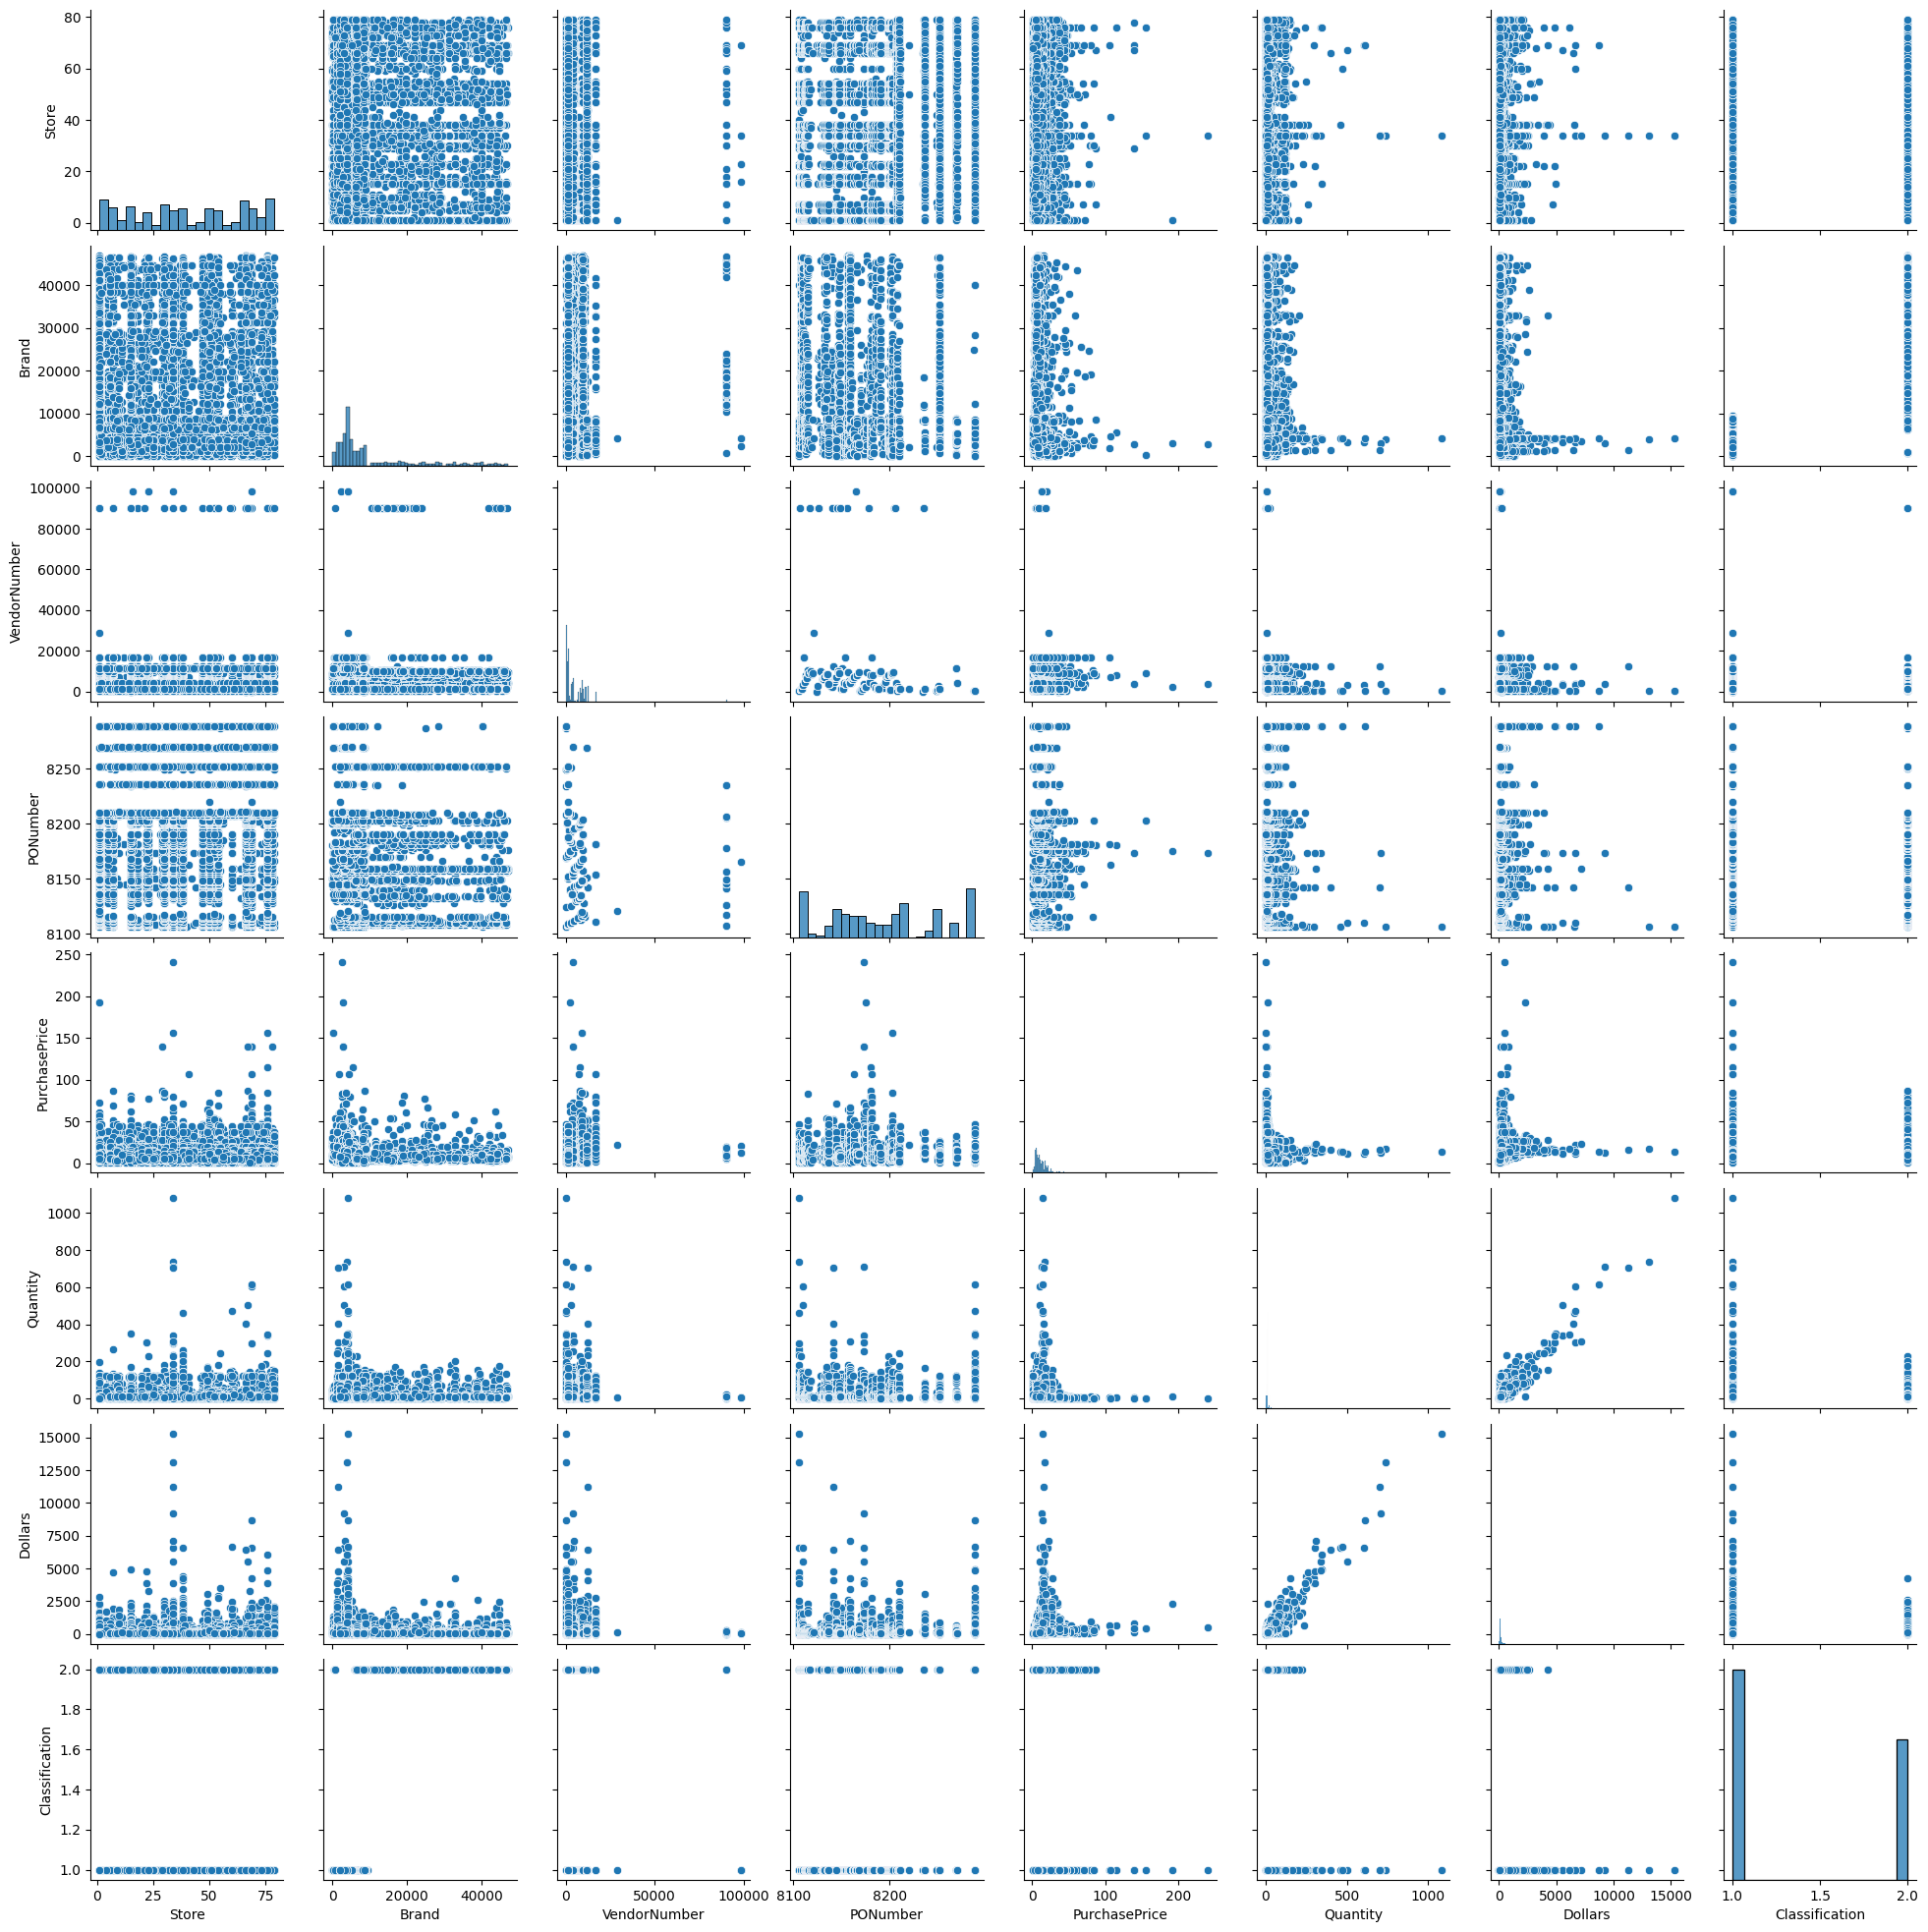

In [46]:
sns.pairplot(data=purchasesfinal1)
plt.show()

In [44]:
purchasesfinal1.corr(numeric_only=True)

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
Store,1.000000,0.002444,-0.034110,0.075676,0.045544,-0.002861,0.016876,-0.004945
Brand,0.002444,1.000000,0.049488,-0.246661,-0.278386,-0.022011,-0.085224,0.730101
VendorNumber,-0.034110,0.049488,1.000000,-0.202735,0.023390,-0.001800,-0.010504,0.026442
PONumber,0.075676,-0.246661,-0.202735,1.000000,0.058958,-0.028489,-0.010216,-0.257530
PurchasePrice,0.045544,-0.278386,0.023390,0.058958,1.000000,-0.112329,0.184185,-0.362850
Quantity,-0.002861,-0.022011,-0.001800,-0.028489,-0.112329,1.000000,0.820051,-0.033707
Dollars,0.016876,-0.085224,-0.010504,-0.010216,0.184185,0.820051,1.000000,-0.110901
Classification,-0.004945,0.730101,0.026442,-0.257530,-0.362850,-0.033707,-0.110901,1.000000


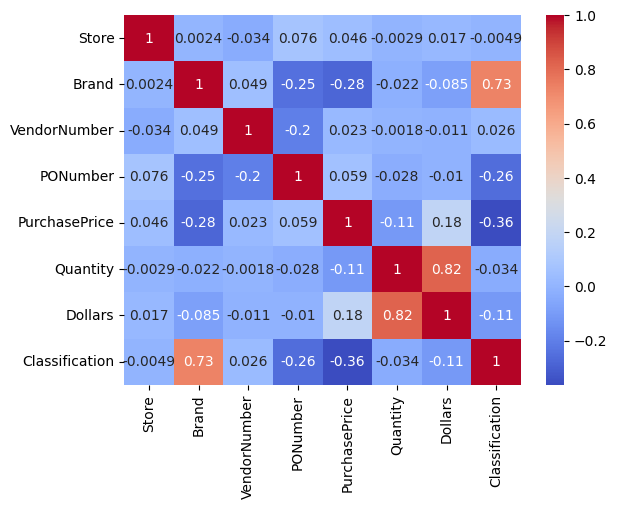

In [45]:
sns.heatmap(purchasesfinal1.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

En las regresiones multiples

In [47]:
data = pd.read_csv('PurchasesFINAL.csv')

In [48]:
#Se eligen las columnas que seran las variables
#Primero la dpendiente (Y) que sera ventas
#y luego las indpendientes (X) tiendas y precio
ols_formula = 'Quantity ~ Store + PurchasePrice'
#Se crea el modelo
OLS = ols(formula = ols_formula, data = data)
#Se ajusta el modelo
model = OLS.fit()
#Se guarda el resumen del modelo en una variable
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2921.
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        22:47:06   Log-Likelihood:            -3.7022e+06
No. Observations:              830857   AIC:                         7.404e+06
Df Residuals:                  830854   BIC:                         7.404e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        14.5320      0.050    290.570      0.000      14.434      14.630
Store             0.0050      0.001      5.146      0.000       0.003       0.007
PurchasePrice    -0.0883      0.001    -76.355      0.000      -0.091      -0.086
==============================================================================
Omnibus:                  1086559.334   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        550684271.253
Skew:                           7.020   Prob(JB):                         0.00
Kurtosis:                     128.339   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

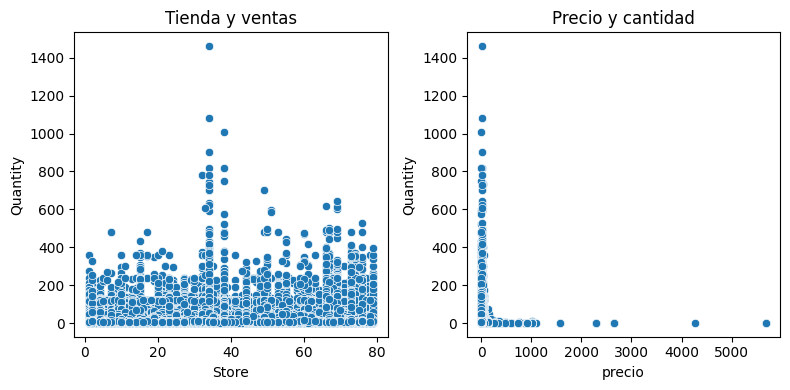

In [49]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = data['Store'], y = data['Quantity'],ax=axes[0])
axes[0].set_title("Tienda y ventas")
sns.scatterplot(x = data['PurchasePrice'], y = data['Quantity'],ax=axes[1])
axes[1].set_title("Precio y cantidad")
axes[1].set_xlabel("precio")
plt.tight_layout()

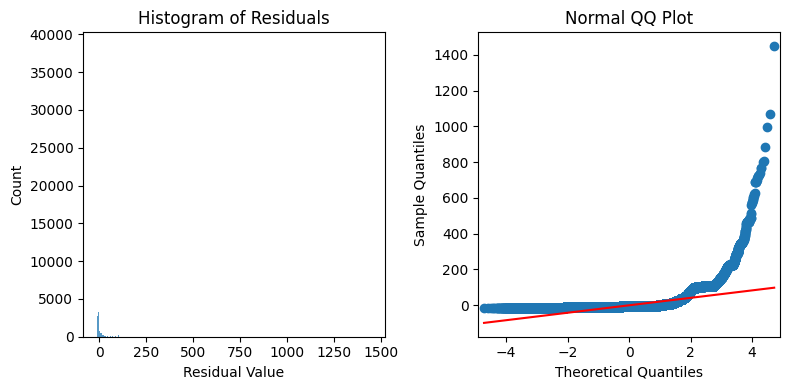

In [50]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()

In [59]:
salesfinal1 = pd.read_csv('SalesFINAL.csv')

In [61]:
salesfinal1.corr(numeric_only=True)

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
Store,1.000000,0.042376,0.011876,0.034957,0.040204,-0.022601,0.045999,-0.002449,0.006962
Brand,0.042376,1.000000,-0.021943,-0.035110,-0.103636,0.033605,0.751074,-0.198070,0.016951
SalesQuantity,0.011876,-0.021943,1.000000,0.614706,-0.089840,-0.069493,-0.021991,0.537648,-0.024347
SalesDollars,0.034957,-0.035110,0.614706,1.000000,0.351751,0.112714,-0.035824,0.679180,-0.006927
SalesPrice,0.040204,-0.103636,-0.089840,0.351751,1.000000,0.209811,-0.128100,0.115122,0.018053
Volume,-0.022601,0.033605,-0.069493,0.112714,0.209811,1.000000,0.102073,0.242237,-0.006068
Classification,0.045999,0.751074,-0.021991,-0.035824,-0.128100,0.102073,1.000000,-0.250189,0.000304
ExciseTax,-0.002449,-0.198070,0.537648,0.679180,0.115122,0.242237,-0.250189,1.000000,-0.006682
VendorNo,0.006962,0.016951,-0.024347,-0.006927,0.018053,-0.006068,0.000304,-0.006682,1.000000


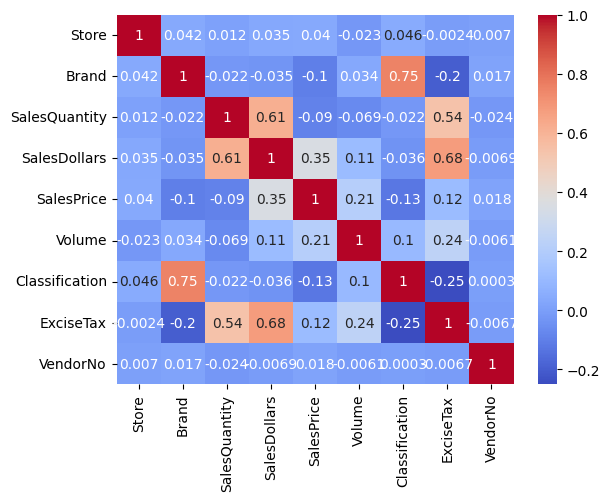

In [62]:
sns.heatmap(salesfinal1.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

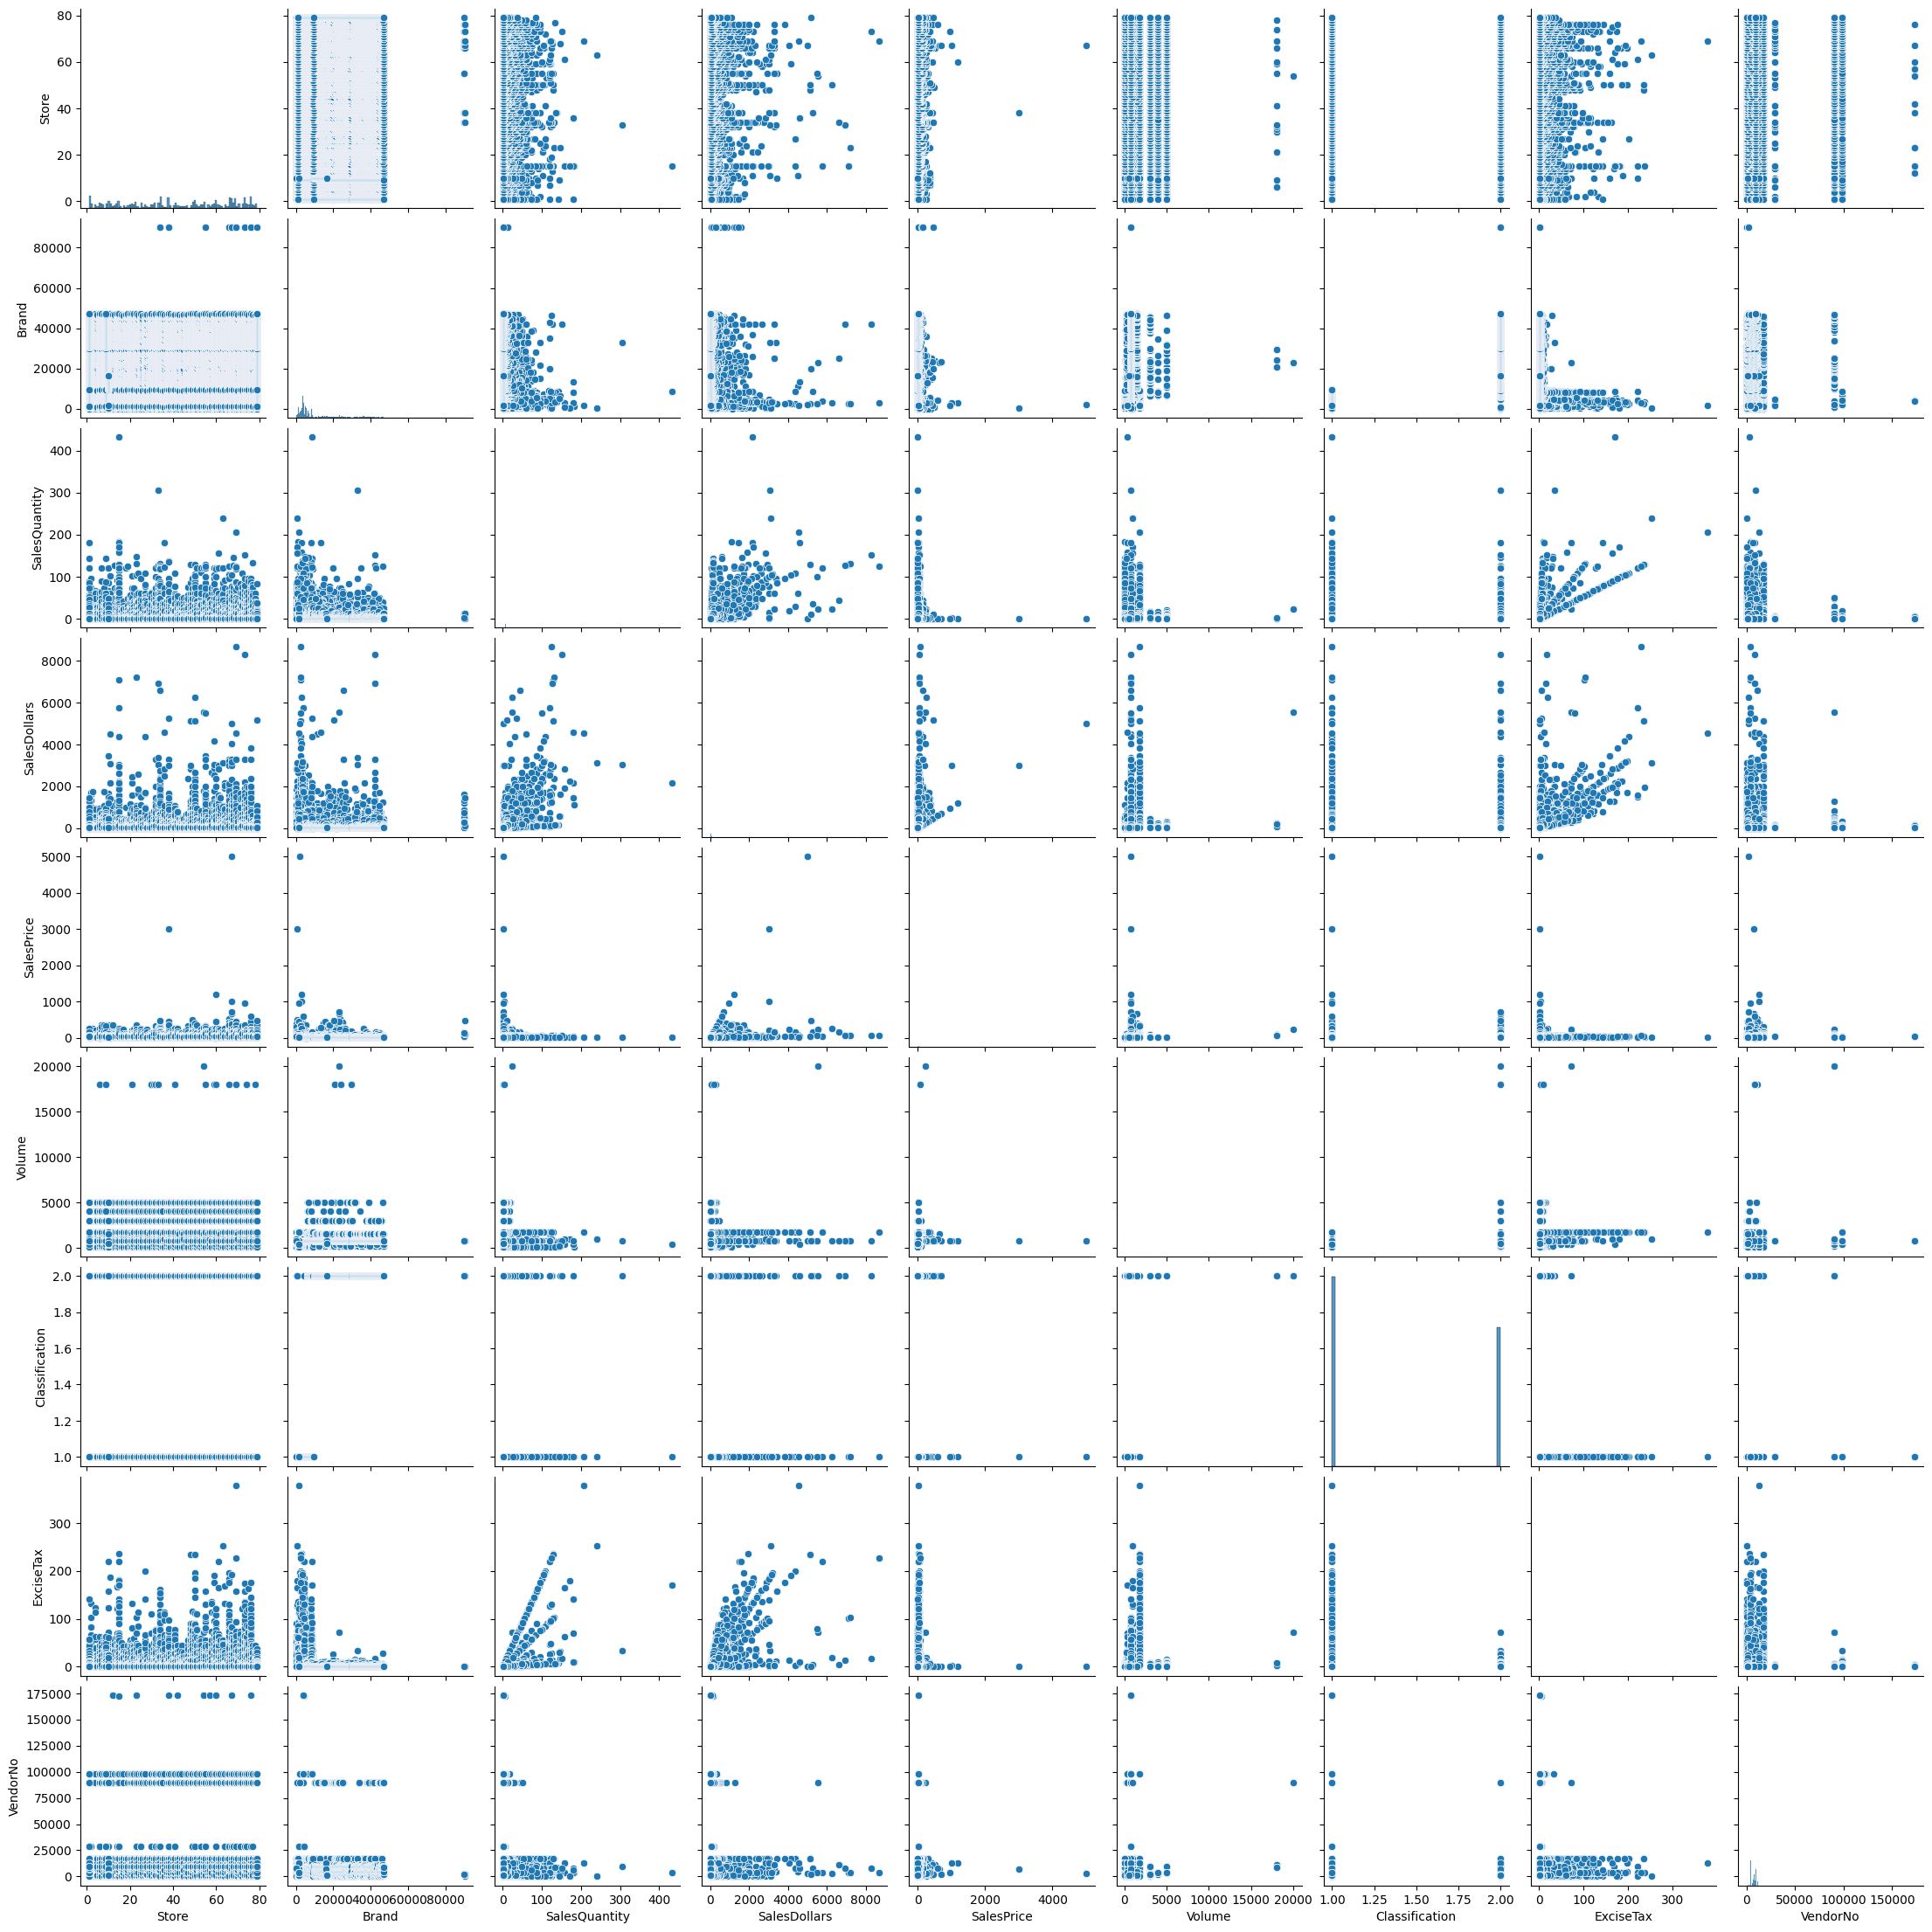

In [63]:
sns.pairplot(data=salesfinal1)
plt.show()

In [65]:
data = pd.read_csv('SalesFINAL.csv')

In [66]:
ols_formula = 'ExciseTax ~ SalesQuantity + SalesDollars'
OLS = ols(formula = ols_formula, data = data)
model = OLS.fit()
model_results = model.summary()
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ExciseTax   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 4.495e+05
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:40:49   Log-Likelihood:            -2.2043e+06
No. Observations:              956556   AIC:                         4.409e+06
Df Residuals:                  956553   BIC:                         4.409e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0617      0.003    -20.596      0.000      -0.068      -0.056
SalesQuantity     0.1868      0.001    207.503      0.000       0.185       0.189
SalesDollars      0.0295    4.9e-05    602.179      0.000       0.029       0.030
==============================================================================
Omnibus:                   492688.412   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      18102954452.803
Skew:                           0.177   Prob(JB):                         0.00
Kurtosis:                     676.946   Cond. No.                         87.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

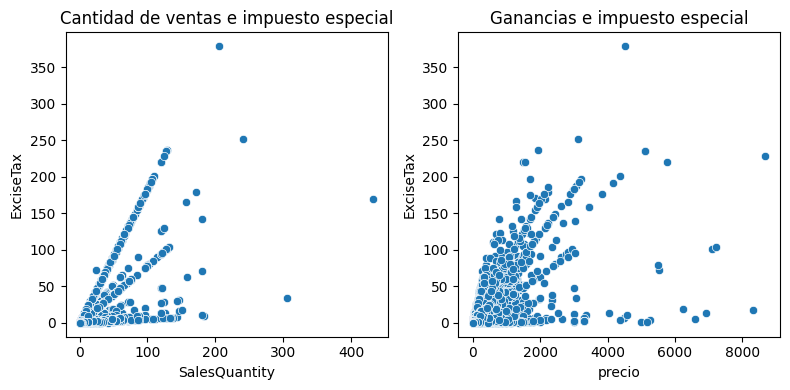

In [67]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = data['SalesQuantity'], y = data['ExciseTax'],ax=axes[0])
axes[0].set_title("Cantidad de ventas e impuesto especial")
sns.scatterplot(x = data['SalesDollars'], y = data['ExciseTax'],ax=axes[1])
axes[1].set_title("Ganancias e impuesto especial")
axes[1].set_xlabel("precio")
plt.tight_layout()

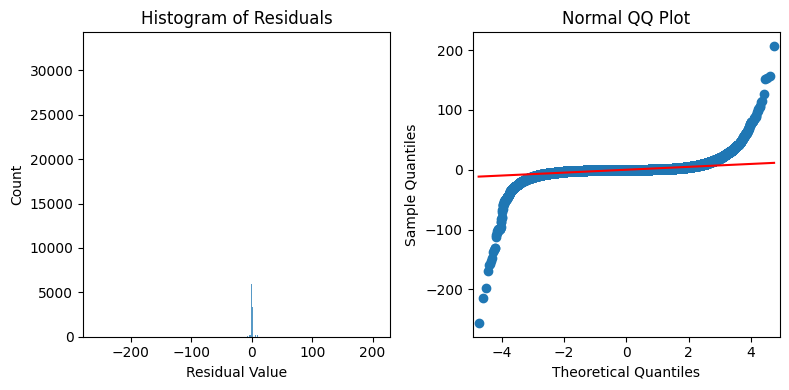

In [68]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")
sm.qqplot(residuals, line='s',ax = axes[1])
axes[1].set_title("Normal QQ Plot")
plt.tight_layout()
plt.show()